In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_stand = pd.read_csv('/content/drive/MyDrive/fitness_data/squat/data_squat_stand.csv')
df_sit = pd.read_csv('/content/drive/MyDrive/fitness_data/squat/data-squat_sit.csv')
df_wrong = pd.read_csv('/content/drive/MyDrive/fitness_data/squat/data_squat_wrong.csv')

In [ ]:
df_squat = pd.concat([df_stand, df_sit, df_wrong])
# df_squat.head(5)
df_squat

,nose_x,nose_y,leftEye_x,leftEye_y,rightEye_x,rightEye_y,leftEar_x,leftEar_y,rightEar_x,rightEar_y,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,leftKnee_x,leftKnee_y,rightKnee_x,rightKnee_y,leftAnkle_x,leftAnkle_y,rightAnkle_x,rightAnkle_y,state
0,360,98,367,89,349,91,379,99,339,100,394,147,318,142,409,172,295,167,380,170,351,152,379,298,320,300,384,405,311,393,385,494,297,476,1
1,365,99,373,90,355,91,383,101,341,100,399,151,314,145,418,191,300,166,371,169,362,165,383,298,322,299,387,405,313,396,383,494,297,479,1
2,357,99,365,90,347,92,378,99,336,101,393,153,317,149,415,184,296,175,368,171,350,166,378,298,318,298,390,404,309,401,385,494,294,481,1
3,355,100,363,90,345,92,376,97,334,100,390,151,315,149,415,184,296,176,367,172,345,169,377,300,319,301,390,406,306,403,385,495,295,478,1
4,354,100,363,90,344,93,375,98,334,101,391,152,316,149,415,180,297,175,370,174,352,168,379,291,319,301,390,409,308,402,385,495,295,481,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,313,338,324,326,301,329,340,323,277,327,349,358,257,366,404,373,244,385,346,384,267,377,338,425,271,421,401,434,206,458,387,538,228,525,3
206,304,329,316,316,291,317,329,315,270,319,350,340,264,357,392,373,253,383,347,374,278,380,342,411,275,410,399,435,202,453,385,539,226,522,3
207,302,322,315,312,290,308,328,313,271,309,346,341,261,347,385,366,196,407,332,368,0,0,336,422,274,420,402,439,211,453,385,540,229,522,3
208,304,301,313,290,289,289,325,296,269,294,343,341,257,334,389,339,200,338,348,339,0,0,331,424,274,412,398,436,209,455,384,537,227,525,3


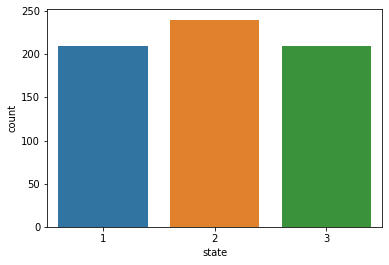

In [ ]:
sns.countplot(x=df_squat['state'])

In [ ]:
print(df_squat.isnull().sum())

nose_x             0
nose_y             0
leftEye_x          0
leftEye_y          0
rightEye_x         0
rightEye_y         0
leftEar_x          0
leftEar_y          0
rightEar_x         0
rightEar_y         0
leftShoulder_x     0
leftShoulder_y     0
rightShoulder_x    0
rightShoulder_y    0
leftElbow_x        0
leftElbow_y        0
rightElbow_x       0
rightElbow_y       0
leftWrist_x        0
leftWrist_y        0
rightWrist_x       0
rightWrist_y       0
leftHip_x          0
leftHip_y          0
rightHip_x         0
rightHip_y         0
leftKnee_x         0
leftKnee_y         0
rightKnee_x        0
rightKnee_y        0
leftAnkle_x        0
leftAnkle_y        0
rightAnkle_x       0
rightAnkle_y       0
state              0
dtype: int64


In [ ]:
corr_matrix = df_squat.corr().round(2)
corr_matrix

,nose_x,nose_y,leftEye_x,leftEye_y,rightEye_x,rightEye_y,leftEar_x,leftEar_y,rightEar_x,rightEar_y,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,leftKnee_x,leftKnee_y,rightKnee_x,rightKnee_y,leftAnkle_x,leftAnkle_y,rightAnkle_x,rightAnkle_y,state
nose_x,1.00,-0.37,1.00,-0.38,1.00,-0.38,0.90,-0.37,0.98,-0.37,0.81,-0.37,0.78,-0.39,0.30,-0.41,0.48,-0.30,0.20,-0.36,0.39,-0.30,0.37,0.03,0.37,0.03,0.07,0.07,0.49,0.29,0.12,0.10,0.42,0.33,-0.54
nose_y,-0.37,1.00,-0.36,1.00,-0.39,1.00,-0.33,1.00,-0.46,1.00,-0.37,0.97,-0.51,0.98,-0.24,0.82,-0.48,0.80,-0.31,0.55,-0.37,0.70,-0.30,0.31,-0.35,0.24,-0.17,-0.20,-0.56,-0.20,-0.28,-0.27,-0.54,-0.36,0.86
leftEye_x,1.00,-0.36,1.00,-0.36,1.00,-0.37,0.90,-0.36,0.99,-0.36,0.81,-0.36,0.78,-0.38,0.30,-0.40,0.48,-0.30,0.19,-0.36,0.39,-0.28,0.37,0.03,0.37,0.03,0.06,0.06,0.48,0.29,0.11,0.09,0.42,0.34,-0.54
leftEye_y,-0.38,1.00,-0.36,1.00,-0.39,1.00,-0.33,1.00,-0.46,1.00,-0.37,0.97,-0.51,0.98,-0.24,0.82,-0.48,0.79,-0.30,0.55,-0.37,0.70,-0.30,0.31,-0.36,0.24,-0.17,-0.20,-0.56,-0.20,-0.28,-0.27,-0.54,-0.36,0.86
rightEye_x,1.00,-0.39,1.00,-0.39,1.00,-0.40,0.89,-0.38,0.99,-0.39,0.82,-0.38,0.79,-0.41,0.32,-0.41,0.50,-0.32,0.21,-0.37,0.40,-0.30,0.37,0.02,0.37,0.01,0.07,0.07,0.49,0.28,0.13,0.11,0.43,0.34,-0.55
rightEye_y,-0.38,1.00,-0.37,1.00,-0.40,1.00,-0.33,1.00,-0.47,1.00,-0.38,0.97,-0.51,0.98,-0.24,0.82,-0.48,0.80,-0.31,0.55,-0.37,0.70,-0.30,0.30,-0.36,0.24,-0.17,-0.20,-0.56,-0.20,-0.28,-0.27,-0.54,-0.36,0.86
leftEar_x,0.90,-0.33,0.90,-0.33,0.89,-0.33,1.00,-0.29,0.89,-0.33,0.74,-0.32,0.71,-0.35,0.26,-0.37,0.45,-0.27,0.14,-0.34,0.39,-0.26,0.33,0.03,0.34,0.03,0.05,0.06,0.44,0.27,0.09,0.08,0.38,0.31,-0.53
leftEar_y,-0.37,1.00,-0.36,1.00,-0.38,1.00,-0.29,1.00,-0.46,1.00,-0.37,0.97,-0.50,0.98,-0.24,0.81,-0.48,0.79,-0.31,0.55,-0.36,0.69,-0.29,0.31,-0.35,0.24,-0.17,-0.20,-0.55,-0.19,-0.27,-0.26,-0.53,-0.35,0.85
rightEar_x,0.98,-0.46,0.99,-0.46,0.99,-0.47,0.89,-0.46,1.00,-0.47,0.82,-0.45,0.81,-0.49,0.32,-0.47,0.53,-0.38,0.23,-0.40,0.43,-0.35,0.38,-0.01,0.39,-0.02,0.08,0.08,0.52,0.29,0.15,0.13,0.47,0.37,-0.61
rightEar_y,-0.37,1.00,-0.36,1.00,-0.39,1.00,-0.33,1.00,-0.47,1.00,-0.38,0.97,-0.51,0.98,-0.24,0.81,-0.48,0.79,-0.31,0.55,-0.37,0.69,-0.30,0.30,-0.36,0.24,-0.17,-0.20,-0.56,-0.20,-0.28,-0.27,-0.54,-0.36,0.86


In [ ]:
x_data = df_squat.drop(columns=['state'], axis=1)
x_data.head(5)

,nose_x,nose_y,leftEye_x,leftEye_y,rightEye_x,rightEye_y,leftEar_x,leftEar_y,rightEar_x,rightEar_y,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,leftKnee_x,leftKnee_y,rightKnee_x,rightKnee_y,leftAnkle_x,leftAnkle_y,rightAnkle_x,rightAnkle_y
0,360,98,367,89,349,91,379,99,339,100,394,147,318,142,409,172,295,167,380,170,351,152,379,298,320,300,384,405,311,393,385,494,297,476
1,365,99,373,90,355,91,383,101,341,100,399,151,314,145,418,191,300,166,371,169,362,165,383,298,322,299,387,405,313,396,383,494,297,479
2,357,99,365,90,347,92,378,99,336,101,393,153,317,149,415,184,296,175,368,171,350,166,378,298,318,298,390,404,309,401,385,494,294,481
3,355,100,363,90,345,92,376,97,334,100,390,151,315,149,415,184,296,176,367,172,345,169,377,300,319,301,390,406,306,403,385,495,295,478
4,354,100,363,90,344,93,375,98,334,101,391,152,316,149,415,180,297,175,370,174,352,168,379,291,319,301,390,409,308,402,385,495,295,481


In [ ]:
y_data = df_squat[['state']]
y_data.head(5)

,state
0,1
1,1
2,1
3,1
4,1


In [ ]:
df_squat.shape

(660, 35)

In [ ]:
# 데이터 표준화
scalar = StandardScaler()
x_data_scaled = scalar.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[360  98 367  89 349  91 379  99 339 100 394 147 318 142 409 172 295 167
 380 170 351 152 379 298 320 300 384 405 311 393 385 494 297 476]
[ 1.15525001 -1.32688542  1.05909819 -1.32380418  1.19059282 -1.31613214
  0.9037314  -1.31263854  1.35993775 -1.33163268  0.80967741 -1.38440188
  1.28107922 -1.43179013  0.271042   -1.26541846  0.92879216 -1.12738214
  0.50058035 -0.88237061  0.88268253 -1.135482    0.45447645 -0.55333343
  0.60650723 -0.40233777  0.05709558  0.01272231  0.90923425  0.04996081
  0.21396713  0.13130529  0.86128945  0.25057656]


In [ ]:
# One-hot encoding
encoder = OneHotEncoder()
y_data_encoded = encoder.fit_transform(y_data).toarray()

print(y_data.values[0])
print(y_data_encoded[0])

[1]
[1. 0. 0.]


In [ ]:
# 학습/검증 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x_data_scaled, y_data_encoded, test_size=0.2, random_state=2021)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(528, 34) (132, 34)
(528, 3) (132, 3)


In [ ]:
model = Sequential([
  Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.02), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=20
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
17/17 [==============================] - 1s 14ms/step - loss: 0.6877 - acc: 0.7576 - val_loss: 0.5359 - val_acc: 0.7955
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.4401 - acc: 0.8523 - val_loss: 0.4563 - val_acc: 0.8409
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3764 - acc: 0.8693 - val_loss: 0.4090 - val_acc: 0.8333
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3397 - acc: 0.8655 - val_loss: 0.3718 - val_acc: 0.8561
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3201 - acc: 0.8920 - val_loss: 0.3822 - val_acc: 0.8409
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.3176 - acc: 0.8826 - val_loss: 0.3747 - val_acc: 0.8788
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3105 - acc: 0.8996 - val_loss: 0.3652 - val_acc: 0.8485
Epoch 8/20
17/17 [==============================] - 0s 4ms/step - loss: 0.3058 - acc: 0.8

In [ ]:
y_pred = model.predict(x_val)

model.evaluate(x_val, y_pred, verbose=2)

5/5 - 0s - loss: 0.3318 - acc: 1.0000 - 19ms/epoch - 4ms/step


[0.33181196451187134, 1.0]

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp1tlpn9u0/assets


In [ ]:
with open('./squat_model.tflite', 'wb') as f:
  f.write(tflite_model)